# PymatgenでのXRDピーク位置、強度の計算

まずは、例によって、Fe3O4の構造を読み込んで、変数matに格納する。

In [4]:
from pymatgen.io.cif import CifParser
path = 'Fe3O4_mp-19306_symmetrized.cif'
parser = CifParser(path)
mat = parser.parse_structures(primitive=False, symmetrized=False)[0]

In [5]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator


In [29]:
xrd_cond = XRDCalculator(wavelength='CuKa', debye_waller_factors={'Fe':0.2, 'O':0.6})
#xrd_cond = XRDCalculator(wavelength='CuKa')

# 文字列で指定する場合は、他に ('CuKa', 'CuKa2', 'CuKa1', 'CuKb1', 'MoKa', 'MoKa2', 'MoKa1', 'MoKb1',
# 'CrKa', 'CrKa2', 'CrKa1', 'CrKb1', 'FeKa', 'FeKa2', 'FeKa1', 'FeKb1', 'CoKa', 'CoKa2', 'CoKa1', 'CoKb1',
# 'AgKa', 'AgKa2', 'AgKa1', 'AgKb1')が使える。

# 小数で指定する場合は、例えば以下のようにする。
# xrd_cond = XRDCalculator(wavelength=1.54056, debye_waller_factors={Element('Fe'):0.2, Element('O'):0.6})


In [30]:
xrd_calcd = xrd_cond.get_pattern(mat)
print(type(xrd_calcd))
# 出力：<class 'pymatgen.analysis.diffraction.core.DiffractionPattern'>

<class 'pymatgen.analysis.diffraction.core.DiffractionPattern'>


In [31]:
dict_xrd_calcd = xrd_calcd.as_dict()
print(dict_xrd_calcd.keys())
# 出力：dict_keys(['@module', '@class', '@version', 'x', 'y', 'hkls', 'd_hkls'])


dict_keys(['@module', '@class', '@version', 'x', 'y', 'hkls', 'd_hkls'])


In [32]:
calcd_x = xrd_calcd.x
calcd_y = xrd_calcd.y
calcd_hkls = xrd_calcd.hkls
calcd_d = xrd_calcd.d_hkls


In [33]:
print(calcd_x[0], calcd_y[0], calcd_hkls[0], calcd_d[0])
#出力：17.98985486665392 7.50841268512196 [{'hkl': (1, 1, 1), 'multiplicity': 8}] 4.926732808708708


18.19712340490444 8.751597852453825 [{'hkl': (1, 1, 1), 'multiplicity': 8}] 4.875128115815514


# Voigt関数の定義と計算

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

def voigt(xval,params):
    norm,center,lw,gw = params
    z = (xval - center + 1j*lw)/(gw * np.sqrt(2.0))
    w = scipy.special.wofz(z)
    model_y = norm * (w.real)/(gw * np.sqrt(2.0*np.pi))
    return model_y


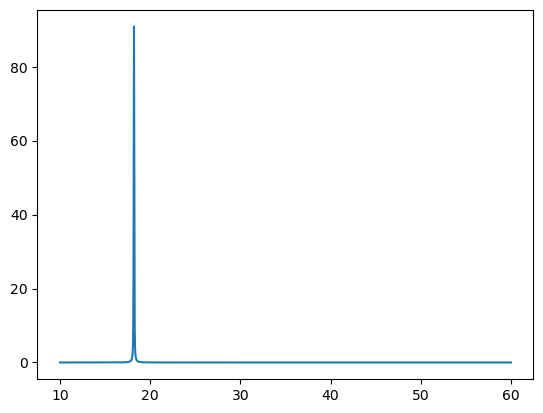

In [35]:
x = np.arange(10,60,0.02)
params = [calcd_y[0], calcd_x[0], 0.02, 0.02]
one_peak = voigt(x, params)

plt.plot(x, one_peak)


# 粉末XRDパターンの計算

Text(0, 0.5, 'Intensity (a.u.)')

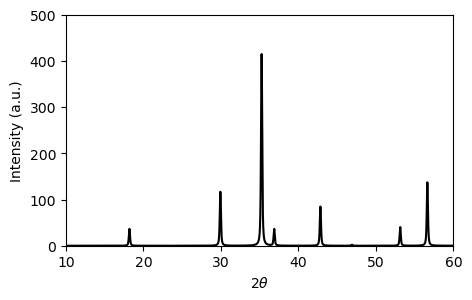

In [37]:
calcd_pattern = np.zeros(len(x))

N = len(calcd_x)
for i in range(N):
    norm = calcd_y[i]
    center = calcd_x[i]
    lw = 0.05
    gw = 0.05
    params = [norm, center, lw, gw]
    calcd_pattern += voigt(x, params)

figure = plt.figure(figsize=(5,3))
ax = figure.add_subplot(111)

ax.plot(x, calcd_pattern,color='0')

ax.set_xlim(10, 60)
ax.set_ylim(0, 500)

ax.set_xlabel(r'2$\theta$')
ax.set_ylabel('Intensity (a.u.)')
